In [20]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('./nearaftercalving.csv',sep=',')

In [22]:
df

,cow,days,TP,ALB,BUN,TCHO,GOT,GGT,Ca,IP,GLU,NH3,NEFA,BHB
0,1,1,8.7,2.8,11.4,112,89,17,10.8,10.8,0,179,118,625.0
1,2,26,7.9,2.7,8.3,96,62,27,9.4,6.7,69,142,64,540.7
2,3,0,7.3,3.5,3.7,125,57,8,8.8,5.0,107,91,379,515.0
3,4,77,7.8,3.4,6.2,96,45,20,10.4,5.8,74,82,53,366.1
4,5,11,7.3,2.9,5.0,62,51,8,8.7,5.0,72,123,553,328.0
5,6,14,7.7,3.5,6.3,120,74,31,9.4,5.6,67,104,65,567.0
6,7,4,8.4,3.0,20.2,96,51,4,10.0,7.0,0,154,82,357.0
7,8,42,7.9,3.8,7.0,118,59,63,9.7,6.5,72,110,31,286.0
8,9,21,7.7,3.5,5.5,92,76,21,10.5,5.2,76,81,152,479.6
9,10,8,8.0,3.7,9.6,92,69,7,10.2,5.6,0,165,161,349.0


In [23]:
df_tr = df

In [24]:
#Standardize
#Calculate the z score of each value in the sample, 
#relative to the sample mean and standard deviation.
clmns = ['days','TP','ALB','BUN','TCHO','GOT', 'GGT', 'Ca','IP','GLU','NH3', 'NEFA','BHB']
df_tr_std = stats.zscore(df_tr[clmns])

In [25]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_tr_std)
labels = kmeans.labels_


In [26]:
df_tr['clusters'] = labels

In [27]:
clmns.extend(['clusters'])


In [44]:
std = df_tr[clmns].groupby(['clusters']).std()


In [45]:
std.to_csv('./std2.csv')

In [46]:
df_tr.to_csv('./nearclust.csv')

Text(27.0903,0.5,'Total Protein')

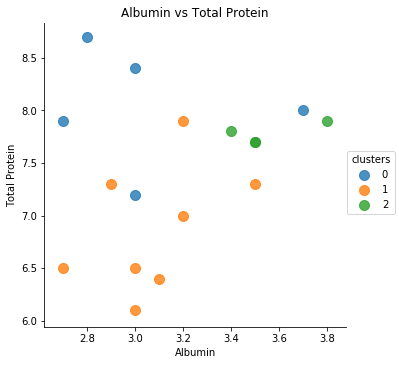

In [41]:
#Scatter plot of Wattage and Duration
ax = sns.lmplot('ALB', 'TP', 
          data=df_tr, 
         fit_reg=False, 
        hue="clusters",  
       scatter_kws={"marker": "D", 
                   "s": 100})


plt.title('Albumin vs Total Protein')
plt.xlabel('Albumin')
plt.ylabel('Total Protein')
